In [1]:
import numpy as np
import networkx as nx
import EoN
import matplotlib.pyplot as plt
import csv, random, pdb, sys
from IPython.core.debugger import set_trace
import copy
import pickle as pkl

In [2]:
sys.path.insert(0, '../lib/')

In [3]:
from util import *
from graph_utils import *

In [4]:
G = nx.generators.random_graphs.erdos_renyi_graph(10000, 0.003)
len(G)

10000

In [5]:
if __name__ == '__main__':
### run for a fixed network and fixed alpha
##########################################

    np.random.seed(0)

    T = 10
    epsilon = 0.001
    alphavals = np.arange(0,50,0.5)
    num_times = 10

    n = len(G)
    p = 0.4
    
    raw_data = []
    exp_inf_list = []
    exp_inf_std = []
    n_vacc_size = []
    xlist_alpha = {}
    ts = {}
    for alpha in alphavals:
        zs = []
        vacc_size = []
        xlist = []
        ts[alpha] = []
        
        print("alpha: ", alpha)

        for i in range(num_times):
            x = {}
            Cvacc = {}
            Cinf = {};
            
            for u in G.nodes():
                x[u] = np.random.randint(0, 2)
                Cinf[u] = 1; 
                Cvacc[u] = Cinf[u]*float(alpha)/n
                
            x, nviol, t = best_response_v2(G, Cvacc, Cinf, x, T, p, epsilon)

            if(nviol == 0):
                
                ts[alpha].append(t)
                
                z = exp_infsize(G, x, p)
                zs.append(z)
                
                vaccinated = len([i for i in x if x[i] == 1])
                vacc_size.append(vaccinated)
                xlist.append(x)

        n_vacc_size.append(vacc_size)
        xlist_alpha[alpha] = xlist
        
        zs = np.array(zs)
        exp_inf_list.append(zs.mean())
        exp_inf_std.append(zs.std())
    
    n_vacc_size = np.array(n_vacc_size)


alpha:  0.0
init comp
degree done
connected components done
end init comp
init comp
degree done
connected components done
end init comp
init comp
degree done
connected components done
end init comp
init comp
degree done
connected components done
end init comp
init comp
degree done
connected components done
end init comp
init comp
degree done
connected components done
end init comp
init comp
degree done
connected components done
end init comp
init comp
degree done
connected components done
end init comp
init comp
degree done
connected components done
end init comp
init comp
degree done
connected components done
end init comp
alpha:  0.5
init comp
degree done
connected components done
end init comp
init comp
degree done
connected components done
end init comp
init comp
degree done
connected components done
end init comp
init comp
degree done
connected components done
end init comp
init comp
degree done
connected components done
end init comp
init comp
degree done
connected components don

In [12]:
print(exp_inf_list)
print(exp_inf_std)

[0.0, 0.0, 0.0, 2.8994279999999996e-05, 0.00013400796000000002, 0.015448300420000002, 0.05263934658, 0.11971775870000001, 0.15222454832, 0.18507165514, 0.21706152356000002, 0.28301683416, 0.31747511752000007, 0.35174496344, 0.3855028951999999, 0.45639190892000003, 0.4933666537599998, 0.5280064574000002, 0.5648472657800002, 0.6367267874199999, 0.6738242490800003, 0.70796744886, 0.7408539766000001, 0.8057478876400003, 0.8353368960000005, 0.86152113868, 0.8863956663600001, 0.9270217650400003, 0.9429791615600003, 0.9559173277799997, 0.9682980997799995, 0.9823438856600006, 0.98836161928, 0.9921816277800002, 0.9950141945400001, 0.9983477537800001, 0.9989047142800007, 0.9992063678599983, 0.9996862343000001, 0.99998560146, 0.9999862014200002, 0.9999858014199999, 0.9999898010600001, 0.9999882012200001, 0.99998760134, 0.9999862014000002, 0.99998960106, 0.9999886011400001, 0.99998580142, 0.99998900112, 0.9999846016000001, 0.99998560148, 0.9999868013600002, 0.9999898011000001, 0.99998780126, 0.999

In [14]:
z4 = exp_inf_list
z4std = exp_inf_std

In [8]:
n_num_vacc_list = np.array(n_vacc_size)
vacc_mean = n_num_vacc_list.mean(axis = 1)
vacc_std = n_num_vacc_list.std(axis = 1)

print(list(vacc_mean))
print(list(vacc_std))

[10000.0, 10000.0, 10000.0, 8328.9, 7862.4, 7458.6, 7049.5, 6301.3, 5945.0, 5595.6, 5271.9, 4647.3, 4343.1, 4053.6, 3780.1, 3239.0, 2972.3, 2731.0, 2482.5, 2019.5, 1790.6, 1585.4, 1392.3, 1023.4, 860.1, 718.0, 585.0, 371.7, 289.2, 222.8, 159.7, 88.6, 58.3, 39.1, 24.9, 8.2, 5.4, 3.9, 1.5, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 9.751410154434076, 12.792185114357904, 13.184839779079606, 8.273451516749223, 16.82884428592766, 9.055385138137417, 10.799999999999999, 12.103305333668155, 12.19877042984251, 12.283729075488434, 15.900943368240766, 16.052725625263765, 17.320508075688775, 11.593532679903914, 14.717336715588184, 18.553975315279473, 14.954932296737422, 13.298120167903432, 16.481504785668086, 14.014635207525

In [10]:
k = np.array(vacc_mean).astype(int)
zs, topk_list =  get_topk_exp_infsize(G, k, p) ## sorted by alpha

TypeError: get_topk_exp_infsize() missing 1 required positional argument: 'p'

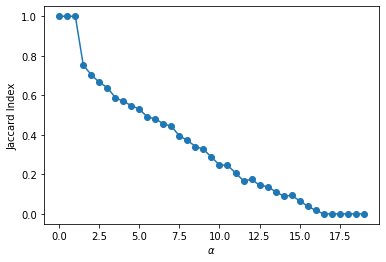

In [16]:
jaccard_mean, jaccard_std = plot_jaccard(alphavals, xlist_alpha, topk_list)

In [22]:
z1 = [0.0, 0.0, 0.0, 5.517458000000001e-05, 0.00139910842, 0.14013671086000004, 0.36354241846, 0.5809914730999999, 0.75036556374, 0.844289017, 0.87669035424, 0.8829611180999999, 0.8831952892, 0.88293211838, 0.8829578996800003, 0.88320197236, 0.8829674125, 0.8827939927200001, 0.8827998331000002, 0.8828517923600001, 0.88323021708, 0.8826771072400001, 0.8830377481999999, 0.88314248602, 0.8832021826600002, 0.8831121477, 0.8830576745800002, 0.8828100299599999, 0.8829771560600002, 0.8831107322399999, 0.88294559982, 0.88295689446, 0.8830134837600001, 0.8833557042399999, 0.8830323798399998, 0.88310950564, 0.8831988832400001, 0.88299017824, 0.8826884314199999, 0.8828362817600001, 0.8826935740599999, 0.8829922720600001, 0.88326236942, 0.88292026842, 0.8830703781, 0.88302935856, 0.88310975288, 0.8827608152399999, 0.8830710010799999, 0.88312503208, 0.8830054442199999, 0.88287041884, 0.88323605186, 0.88286110202, 0.8830137665999999, 0.88305577206, 0.88279411424, 0.8827826656200001, 0.88314706234, 0.8828580542399997, 0.88292216602, 0.88306959226, 0.88337710062, 0.88274794056, 0.8830244704599999, 0.8830546612599999, 0.8829768328400002, 0.8828576045400001, 0.8830506356199999, 0.8830538485200001, 0.8829261031600002, 0.8830316827400001, 0.8830307982999999, 0.8829552031600001, 0.8831231229600001, 0.8827995559199999, 0.8828168595400001, 0.8830879723599999, 0.8828299069200002, 0.8830176848200001, 0.8829769732000001, 0.8827295921200001, 0.88318118366, 0.8830137955400001, 0.8831650001000002, 0.88287546658, 0.8829890192799998, 0.8828231711599999, 0.8828952740200002, 0.88303963194, 0.8827916030199999, 0.8829999887400002, 0.8828352129599999, 0.8829079000999999, 0.88262619996, 0.8827824553200001, 0.8829676086000001, 0.8830026773399998, 0.8829328829800003, 0.88281945356]
z1std = [0.0, 0.0, 0.0, 5.443752194947872e-07, 0.00012918937230027707, 0.0021923370208032996, 0.002242474961943914, 0.0017629796253160548, 0.002892659274576141, 0.0024586761770510677, 0.0011667260400282638, 0.0004726287421235637, 0.0004824598552802305, 0.0007676667667305621, 0.0005108623722300571, 0.00046816805020863503, 0.0003592117776235254, 0.0006571190588350366, 0.0005707325322162238, 0.000632045019880369, 0.00043879330974248165, 0.0004576374719829008, 0.0005358014057331926, 0.0006544198012712933, 0.00042435958820540113, 0.00043275557091209305, 0.0003472554713006495, 0.0004699845990000335, 0.0005027324768440718, 0.0002564160035027131, 0.00037715552563538104, 0.00036039824606928664, 0.0005688239909499863, 0.0005145979341314462, 0.0005629751621978504, 0.00034134223940819223, 0.0004528465988017579, 0.0005625214270993503, 0.0005159056623813775, 0.00044615540759186494, 0.0005473872801523282, 0.0005609819154127148, 0.0009134638216571534, 0.00044808195162538534, 0.0006116461352580723, 0.0005172154770809208, 0.00025770581007112894, 0.00041973807497523784, 0.0002660659210794089, 0.0005201466125998559, 0.00042932067894751595, 0.0006298848923448003, 0.00044325463003478646, 0.0008707257198567799, 0.00045979782685229455, 0.0005976657088516408, 0.0007177092005804183, 0.0006016472698280669, 0.0007137303447397631, 0.0006707159171491018, 0.00041859112964397015, 0.00047409402537669786, 0.0005932712994407749, 0.00038127621244621313, 0.0002648834694408893, 0.0004269220069211648, 0.0006119337968370925, 0.0005611237451813592, 0.0005425734704056878, 0.0006273320385084693, 0.0004029893316180715, 0.00036765680930962377, 0.0005162189859138975, 0.0005778200493818091, 0.0005062627841104754, 0.0006348360359213549, 0.0004225666738576704, 0.0002876110874764043, 0.00035696951329950853, 0.0004105081606904455, 0.00043265138980465713, 0.0005290467072501868, 0.0005186924571994609, 0.0005437483156714256, 0.000584187403273884, 0.0003257958285388839, 0.0005112566254464577, 0.000595725702163805, 0.0005262503152408947, 0.0006692055197971834, 0.0005663368527955791, 0.00024118526764627376, 0.0004118580669357045, 0.0005326723900640578, 0.00035015805312204126, 0.0005824343192465771, 0.0005282535075762344, 0.0005001035946779228, 0.0005156644088510252, 0.00042183076552124095]

z3 = [0.0, 0.0, 0.0, 2.5000019999999996e-05, 0.00054448272, 0.0218610651, 0.09444373396, 0.1668111538, 0.20214403858000002, 0.27330720556, 0.34441063114, 0.38087832070000005, 0.45416001817999996, 0.5270538366199998, 0.5638005446, 0.6366562999000001, 0.7093555551800002, 0.7423191769599998, 0.8047802005599998, 0.8606522793799998, 0.88505228998, 0.9252256784400004, 0.9566719495800002, 0.96816797788, 0.9836133412800002, 0.9911251264399997, 0.9940620074399998, 0.9977100282199997, 0.9995434834800001, 0.9997342420600006, 0.999741442860001, 0.9997568389600009, 0.9997512403400011, 0.9997584388200009, 0.9997466406600009, 0.9997622376000008, 0.9997494402800008, 0.9997526399200009, 0.9997548392200007, 0.9997504407600009, 0.9997538403800007, 0.9997478410200008, 0.9997578391000008, 0.9997464419200008, 0.9997674375600007, 0.999755039280001, 0.9997324441200008, 0.9997320451800009, 0.9997506393800009, 0.999739843000001, 0.9997448421600007, 0.999753840640001, 0.9997646366200008, 0.9997580387200008, 0.9997558394200008, 0.9997446408000009, 0.9997740364000007, 0.9997588380200007, 0.9997528394800008, 0.999753040040001, 0.999748240840001, 0.999754639420001, 0.9997490410800008, 0.999754839500001, 0.9997574388200008, 0.9997434425600009, 0.9997544398400009, 0.9997470407200011, 0.9997566391200008, 0.9997642374600009, 0.9997458416600009, 0.9997574397400009, 0.9997438417800009, 0.9997568392000009, 0.999758238980001, 0.9997620372000011, 0.9997502398200009, 0.9997520402600009, 0.999761838280001, 0.9997440421600009, 0.9997592379200009, 0.9997536398600009, 0.9997506411200009, 0.9997462411600008, 0.9997642374800009, 0.9997582384600008, 0.9997574400600007, 0.999757838520001, 0.9997444422600008, 0.999756638640001, 0.9997440430800009, 0.9997608382000008, 0.9997476417600011, 0.9997604380600009, 0.9997602392800008, 0.9997688369200007, 0.9997550404400009, 0.9997596385800008, 0.9997570403200008, 0.999752439460001]
z3std = [0.0, 0.0, 0.0, 3.490018848086599e-07, 9.720658893890679e-05, 0.0009109802660907929, 0.0009205302423845788, 0.0017834006641063468, 0.0018463457594366606, 0.0013628904639103982, 0.0021206457485581386, 0.001793217361387615, 0.0017401339696072303, 0.002316443112313244, 0.0017649889862303672, 0.0014577544726176663, 0.002856547294019805, 0.002268950380963693, 0.002127142988276875, 0.002019797688940905, 0.002382424402472439, 0.00206760008917819, 0.0018692006497930467, 0.0006605470206605675, 0.0012909351942262345, 0.0011283181024376537, 0.0007425526981043793, 0.0006039042973963371, 0.00015850461017434046, 5.744572604470598e-05, 2.889409691843313e-05, 1.9697827352997742e-05, 1.092225223219944e-05, 1.997206649854182e-05, 1.772859227598139e-05, 2.6608963137670465e-05, 1.485706673419664e-05, 1.63673296363832e-05, 1.6371929106677177e-05, 1.9566834572915234e-05, 2.204114344275919e-05, 2.3344358406978326e-05, 1.5029412793805173e-05, 1.5274844705431514e-05, 2.8490016380966933e-05, 1.732230060333317e-05, 1.8922866757441597e-05, 2.119861766312437e-05, 2.1480913623051756e-05, 7.86967377779254e-06, 1.701740081559299e-05, 2.9690238066900644e-05, 1.5176637031547084e-05, 2.4374731836145606e-05, 2.0730442233944014e-05, 2.205009636580755e-05, 1.959198452793397e-05, 2.7579370682477492e-05, 1.1175661108328596e-05, 1.488947865997929e-05, 2.2506118592725048e-05, 2.0723352965968656e-05, 1.8374576584664156e-05, 1.7344514261785203e-05, 1.5592435397558423e-05, 1.9283882747102003e-05, 1.69379405012462e-05, 1.7574195286468015e-05, 1.6416558582470988e-05, 2.0458961823073775e-05, 1.5080860871964348e-05, 2.6421819177106055e-05, 2.212977047925074e-05, 8.726002606838967e-06, 1.840114854162003e-05, 1.888569226262475e-05, 1.3574988841369163e-05, 2.2302412910814428e-05, 2.2057665758677973e-05, 1.9075505131173827e-05, 1.965685558250969e-05, 2.291747450037624e-05, 3.2155064263836744e-05, 1.6156723450344125e-05, 2.3446589389021585e-05, 2.434984360377047e-05, 1.909668899714373e-05, 2.069295689373242e-05, 2.3972447724206092e-05, 2.6543160069533044e-05, 3.056191419899301e-05, 1.9616026611901918e-05, 1.7700368009627776e-05, 1.8732204569632928e-05, 2.2415851791338325e-05, 1.7867026159073544e-05, 2.0571845527598844e-05, 2.4074361787677518e-05, 1.997987055398192e-05, 2.079490079992187e-05]

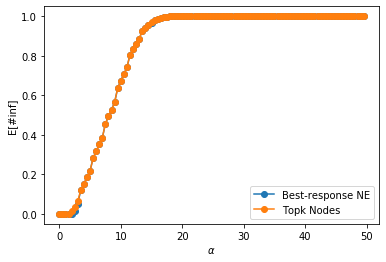

In [15]:
legend = ['Best-response NE', 'Topk Nodes']
plt.plot(alphavals, z4, 'o-')
plt.plot(alphavals, zs, 'o-')
plt.xlabel(r'$\alpha$')
plt.ylabel('E[#inf]')
plt.legend(legend)
plt.show()

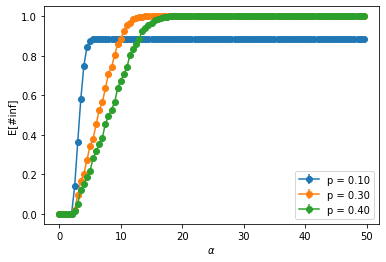

In [23]:
z = [z1, z3, z4]
zstd = [z1std, z3std, z4std]
ps = [0.1,0.3,0.4]
legend = ['p = ' + str('%0.2f'%i) for i in ps]
for y, ystd in zip(z,zstd):
    plt.errorbar(alphavals, y, ystd, fmt = 'o-')
plt.xlabel(r'$\alpha$')
plt.ylabel('E[#inf]')
plt.legend(legend)
plt.savefig('erdos_exp_inf.pdf')
plt.show()

In [33]:
v1 = [10000.0, 10000.0, 10000.0, 7035.3, 5263.6, 3752.2, 2458.7, 1368.7, 577.9, 161.1, 26.2, 0.7, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
v1std = [0.0, 0.0, 0.0, 11.798728745080972, 15.147276983009192, 13.504073459515837, 10.178899744078432, 10.450358845513392, 10.839280418920804, 8.3, 4.354308211415448, 0.6403124237432849, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]

v3 = [10000.0, 10000.0, 10000.0, 8317.5, 7443.8, 7047.0, 6294.5, 5599.8, 5266.3, 4639.7, 4055.2, 3770.5, 3227.2, 2719.7, 2475.2, 2010.8, 1571.3, 1378.9, 1025.4, 720.2, 589.9, 379.2, 217.4, 158.9, 80.9, 43.2, 28.4, 10.2, 1.0, 0.1, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
v3std = [0.0, 0.0, 0.0, 12.587692401707312, 11.22319027727856, 9.50789145920377, 9.687620966986684, 17.94324385388551, 16.012807374099022, 11.153923076657827, 16.296011782028142, 13.55912976558599, 12.480384609458156, 15.388632167934876, 11.417530380953666, 8.986656775464388, 16.811008298136073, 13.209466302617983, 11.723480711802276, 10.759182125050211, 12.621014222319852, 10.740577265678043, 9.520504188329525, 3.3000000000000003, 6.456779382943171, 5.635601121442149, 3.6932370625238775, 2.9933259094191533, 0.7745966692414834, 0.30000000000000004, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


v4 = [10000.0, 10000.0, 10000.0, 8328.9, 7862.4, 7458.6, 7049.5, 6301.3, 5945.0, 5595.6, 5271.9, 4647.3, 4343.1, 4053.6, 3780.1, 3239.0, 2972.3, 2731.0, 2482.5, 2019.5, 1790.6, 1585.4, 1392.3, 1023.4, 860.1, 718.0, 585.0, 371.7, 289.2, 222.8, 159.7, 88.6, 58.3, 39.1, 24.9, 8.2, 5.4, 3.9, 1.5, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
v4std = [0.0, 0.0, 0.0, 9.751410154434076, 12.792185114357904, 13.184839779079606, 8.273451516749223, 16.82884428592766, 9.055385138137417, 10.799999999999999, 12.103305333668155, 12.19877042984251, 12.283729075488434, 15.900943368240766, 16.052725625263765, 17.320508075688775, 11.593532679903914, 14.717336715588184, 18.553975315279473, 14.954932296737422, 13.298120167903432, 16.481504785668086, 14.014635207525025, 12.737346662472527, 13.25481044753187, 11.636150566231086, 8.449852069711044, 10.696261028976433, 9.228217596047461, 8.23164625090267, 6.116371473349211, 8.052328855678958, 5.950630218724736, 2.9137604568666933, 4.036087214122113, 2.638181191654584, 1.1135528725660042, 0.9433981132056604, 0.9219544457292888, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]

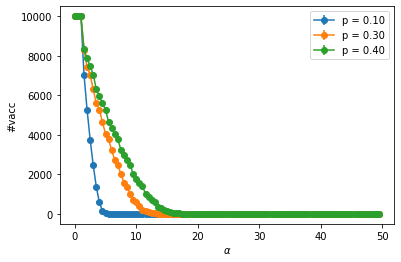

In [36]:
v = [v1, v3, v4]
vstd = [v1std, v3std, v4std]
ps = [0.1,0.3,0.4]
legend = ['p = ' + str('%0.2f'%i) for i in ps]
for y, ystd in zip(v,vstd):
    plt.errorbar(alphavals, y, ystd, fmt = 'o-')
plt.xlabel(r'$\alpha$')
plt.ylabel('#vacc')
plt.legend(legend)
plt.savefig('erdos_vacc.pdf')
plt.show()

In [ ]:
max([G.degree(v) for v in G.nodes()])

In [ ]:
compare_degree(G, 'whole graph ')
compare_cc(G, 'whole graph ')

In [ ]:
for alpha in range(15):
    v = set(get_provax(xlist_alpha[alpha][0]))
    s = G.subgraph(v)

    compare_degree(s, 'vaccinated nodes alpha: ' + str(alpha))
    compare_cc(s, 'vaccinated nodes alpha: ' + str(alpha))